# Finne anomalier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fil_navn = 'DIN_FILNAVN.xlsx'
df = pd.read_excel(fil_navn)

# Dropping NA values from the 'Fakt' column for calculation
df = df.dropna(subset=['Fakt'])

# drop NA values og verdier over 90
df = df[df['Fakt'] < 90].dropna(subset=['Fakt'])

# Calculate the IQR
Q1 = df['Fakt'].quantile(0.25)
Q3 = df['Fakt'].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

# Find anomalies in the 'Fakt' column
anomalies = df[(df['Fakt'] < lower_bound) | (df['Fakt'] > upper_bound)]

print("Anomalies in the 'Fakt' column:")
print(anomalies)

# Apply a function to determine the color of each point based on whether it is an outlier
colors = df['Fakt'].apply(lambda x: 'red' if (x < lower_bound) or (x > upper_bound) else 'black')

# Create scatter plot
plt.scatter(df.index, df['Fakt'], c=colors, marker=".")
plt.axhline(y=upper_bound, color='green', linewidth=2)

# Add labels and title
plt.xlabel('Est')
plt.ylabel('Fakt')
plt.title('spredningsdiagram (anomalier i rødt)')

# Show plot
plt.show()


## EKsempel på deskriptiv analyse

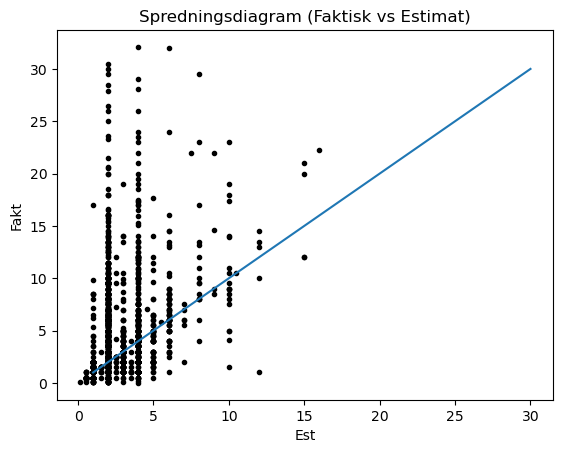

In [6]:

# Endrer litt på hvilket data jeg ønsker å ha med for å se variasjonene i dataen

temp_df = df[df['Fakt'] < 35].dropna(subset=['Fakt'])
temp_df = df[df['Est.'] < 20].dropna(subset=['Est.'])

# Create scatter plot
plt.scatter(temp_df['Est.'], temp_df['Fakt'], marker='.', color="black")
plt.plot([1,30], [1,30])

# Add labels and title
plt.xlabel('Est')
plt.ylabel('Fakt')
plt.title('Spredningsdiagram (Faktisk vs Estimat)')

# Show plot
plt.show()


# Faktisk som funksjon av tid


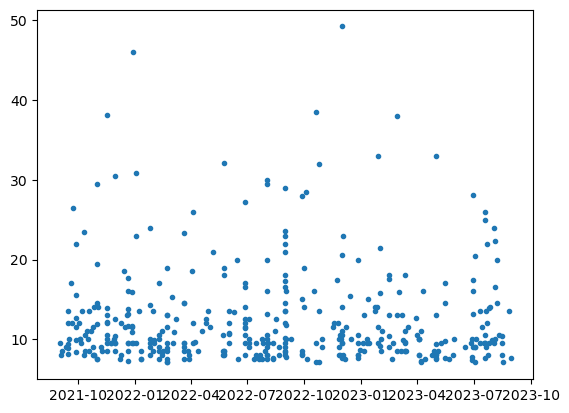

In [20]:
from sklearn.linear_model import LinearRegression
from matplotlib.dates import date2num

# Sørger for å konvertere til dato datatype
anomalies_copy = anomalies.copy()
anomalies_copy['Ferdig'] = pd.to_datetime(anomalies_copy['Ferdig'])
anomalies_sorted = anomalies_copy.sort_values(by='Ferdig')


plt.scatter(anomalies_sorted['Ferdig'], anomalies_sorted['Fakt'], marker='.')

# Linear regresjon

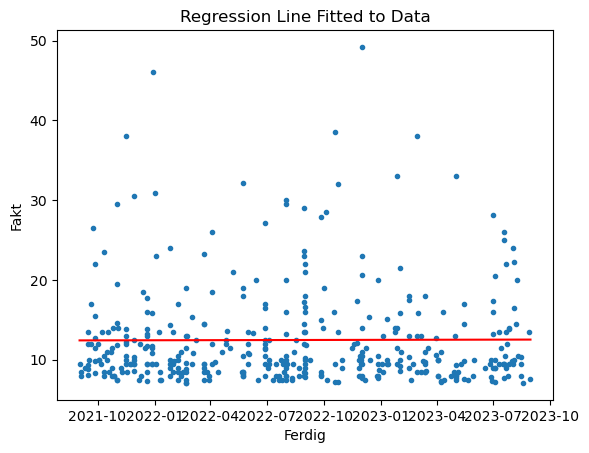

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.dates import date2num

# Assuming anomalies_sorted is your DataFrame
anomalies_sorted['Ferdig_ordinal'] = anomalies_sorted['Ferdig'].apply(lambda x: date2num(x))

# Reshape data
X = anomalies_sorted['Ferdig_ordinal'].values.reshape(-1, 1)
y = anomalies_sorted['Fakt'].values

# Create a linear regression model
model = LinearRegression()

# Fit the model using your data
model.fit(X, y)

# Predict y-values
y_pred = model.predict(X)

# Plotting the original data points
plt.scatter(anomalies_sorted['Ferdig'], anomalies_sorted['Fakt'], marker='.')

# Plotting the regression line
plt.plot(anomalies_sorted['Ferdig'], y_pred, color='red')

# Adding labels and title for better understanding
plt.xlabel('Ferdig')
plt.ylabel('Fakt')
plt.title('Regression Line Fitted to Data')

# Displaying the plot
plt.show()


## Relativ frekvens


Scenario	Antall Vinnere	Relativ Frekvens (%)
1		0		0.00
11		1		9.09
21		3		14.29
31		1		3.23
41		8		19.51
51		7		13.73
62		8		12.90
72		13		18.06
82		16		19.51
92		12		13.04
102		16		15.69
113		23		20.35
123		20		16.26
133		19		14.29
143		23		16.08
153		26		16.99
163		22		13.50
174		29		16.67
184		46		25.00
194		29		14.95
204		30		14.71
214		46		21.50
225		27		12.00
235		40		17.02
245		55		22.45
255		33		12.94
265		39		14.72
275		47		17.09
286		63		22.03
296		45		15.20
306		43		14.05
316		53		16.77
326		55		16.87
337		69		20.47
347		60		17.29
357		48		13.45
367		61		16.62
377		56		14.85
387		60		15.50
398		77		19.35
408		77		18.87
418		62		14.83
428		80		18.69
438		79		18.04
449		82		18.26
459		85		18.52
469		84		17.91
479		75		15.66
489		71		14.52
500		73		14.60


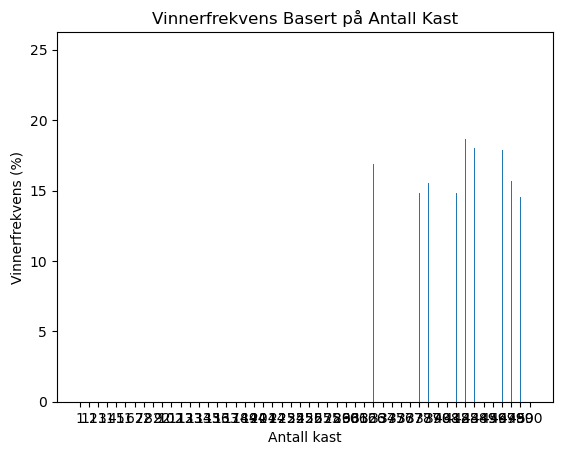

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_dice_rolls(num_rolls):
    return np.random.choice([1,2,3,4,5,6], size=num_rolls).tolist().count(6)

def simulate_scenarios(scenarios):
    results = {}
    for scenario in scenarios:
        results[scenario] = simulate_dice_rolls(scenario)
    return results

def print_and_plot_results(results):
    print("Scenario\tAntall Vinnere\tRelativ Frekvens (%)")
    for key, value in results.items():
        print(f"{key}\t\t{value}\t\t{value / key * 100:.2f}")
        
    x = results.keys()
    y = [value / key * 100 for key, value in results.items()] 
    plt.bar(x, y)
    plt.xlabel('Antall kast')
    plt.ylabel('Vinnerfrekvens (%)')
    plt.title('Vinnerfrekvens Basert på Antall Kast')
    plt.xticks(list(x))
    plt.yticks(range(0, 30, 5))
    plt.show()

# Definer scenarier (antall kast)
scenarios = np.linspace(1, 500, 50, dtype=int)  # 50 scenarioer fra 1 til 500
results = simulate_scenarios(scenarios)

# Skriver ut og viser resultater
print_and_plot_results(results)


# Kategorisering av data 


### Kostand_stad_navn

In [ ]:
# Last inn dataene dine i en DataFrame
fil_navn = 'DIN_FILNAVN.xlsx'
df = pd.read_excel(fil_navn)
df

In [ ]:

# Gruppere etter 'objekt_navn' og få gjennomsnittet for hver gruppe
gruppert_df = df.groupby('objekt_navn').size().sort_values(ascending=False)

print(gruppert_df)

gruppert_df = df.groupby('kostnad_stad_navn').size().sort_values(ascending=False)
print("\n******** kostand_stad_navn ***********")
print(gruppert_df)

df['kostnad_stad_navn'].value_counts().plot(kind='barh', figsize=(10,6), xlabel="Kostnad_stad_navn")
plt.show()


### ABS indicator

In [ ]:

# kategoriser og plotte antall abs_indicator
df['abc_indikator'].value_counts().sort_index().plot(kind='barh', figsize=(10,6), xlabel="abc_indikator")
plt.show()

# Scatter plot

# Få verdikontoene for abc_indikator
abc_counts = df['abc_indikator'].value_counts().sort_index()
# X og Y koordinater (her, vi bare bruker 0 for Y siden vi ikke har en sekundær variabel)
x = range(len(abc_counts))
y = [0] * len(abc_counts)

# Størrelsen på boblene skal være proporsjonal med antall observasjoner
sizes = abc_counts.values * 100  # Multipliser med en konstant for å justere boblestørrelsen

plt.figure(figsize=(10, 6))

# Lager scatterplott
plt.scatter(x, y, s=sizes, alpha=0.5)

# Annoter boblene med de korresponderende etikettene
for i, txt in enumerate(abc_counts.index):
    plt.annotate(txt, (x[i], y[i]), ha='center', va='center', fontsize=12, color='black')

# Fjern y-aksen ettersom den ikke representerer noe i dette tilfellet
plt.yticks([])

# Sett x-aksen etiketter som abc_indikator verdiene
plt.xticks(x, abc_counts.index, rotation=45)

# Sett titler og etiketter
plt.title('Antall av hver unik abc_indikator', fontsize=15)
plt.xlabel('abc_indikator', fontsize=12)

# Vis plottet
plt.tight_layout()
plt.show()



### Signatur

In [ ]:

# Få antall unike signaturer
signatur_counts = df['signatur'].value_counts()

# Filtrer signaturene som har mer enn "antall_signatur" 
# Du kan selv endre på antall_signatur for å excludere de so mhar få
antall_signatur = 10
filtered_signatur_counts = signatur_counts[signatur_counts > antall_signatur]

# Lage bar-plot
filtered_signatur_counts.plot(kind='bar', figsize=(10,6), xlabel="Signatur - ansatt", ylabel="Antall", color='skyblue')

# Vis plottet
plt.tight_layout()
plt.show()


Antall jobber per time

In [ ]:
# Filtrer datasettet for den spesifikke ansatte
ansatt_df = df[df['signatur'] == 'a224413']

ansatt_df = df # Kan gruppere vaktutkallinger for hele datasettet
# Konverter dato kolonnen til datetime objekt hvis den ikke allerede er
ansatt_df['dato'] = pd.to_datetime(ansatt_df['dato'])

# Ekstraher timen og kategoriser i tidsrom
ansatt_df['time'] = ansatt_df['dato'].dt.hour

# Telle antall jobber i hver time
time_counts = ansatt_df['time'].value_counts()

# Sortere resultatet for bedre visning
time_counts = time_counts.sort_index()

# Printe resultatet
print(time_counts)

# Lage bar-plot
plt.figure(figsize=(12, 6))
plt.bar(time_counts.index, time_counts.values, color='skyblue')

# Legge til titler og etiketter
plt.title('Antall jobber per time (Totalt)', fontsize=15)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Antall jobber', fontsize=12)
plt.xticks(range(24))  # Setter x-aksen ticks til hver time

# Vis plottet
plt.tight_layout()
plt.show()

# Dataforberedelse
Dataforberedelse er prosessen med å rense, strukturere og berike rådata til et ønsket format for bedre beslutningsstaking og analyse. Det er en kritisk trinn i datanalyseprosessen, da kvaliteten på data påvirker kvaliteten på innsiktene som kan oppnås.

In [ ]:
fil_navn = 'DIN_FILNAVN.xlsx'
df = pd.read_excel(fil_navn)
df

## Data Rensing
Vi kan tenke oss at sum_timar og fagomraade_kode er relevante for oss for vår analyse. Først kan vi fjerne alle rader med NaN-verdier i relevante kolonner: 

In [ ]:
# 
fil_navn = 'DIN_FILNAVN.xlsx'
df = pd.read_excel(fil_navn)

# Få de ekskluderte radene
ekskludert_df = df[df['sum_timar'].isna() | df['fagomraade_kode'].isna()]

antall_rader_org = len(df)
# Print ut de ekskluderte dataene
ekskludert_df[['hend_id','sum_timar', 'fagomraade_kode']]


In [ ]:
# Fjern NaN-verdiene fra den opprinnelige df

df.dropna(subset=['sum_timar', 'fagomraade_kode'], inplace=True)
print("Antall rader som vi ekskluderer: ", antall_rader_org - len(df))
df

## Datatransformasjon:

Konvertere 'dato' kolonnen til en faktisk datotype (hvis den ikke allerede er det):

In [ ]:
df['dato'] = pd.to_datetime(df['dato'])
df

## Datautvinning:

La oss anta at vi vil kombinere data fra "ao_tekst" og "hendelse_tekst" for å lage en ny kolonne "beskrivelse":

In [ ]:
pd.set_option('display.max_colwidth', None)
df['beskrivelse'] = "[" +df['objekt_navn'] + "] " + df['ao_tekst'] + " - " + df['hendelse_tekst'] + " - Hilsen " +df['signatur'] 
df[['beskrivelse', 'ao_tekst', 'hendelse_tekst']]


# Dataanrikning:

Anta at vi vil legge til en ny kolonne som indikerer om en hendelse skjedde i helgen eller ikke:

In [ ]:
mandag = 0
tirsdag = 1
onsdag = 2
torsdag = 3
fredag = 4
lørdag = 5
søndag = 6
df['helg'] = df['dato'].dt.weekday >= lørdag

df[df['helg'] == True][['hend_id','objekt_navn','dato', 'helg']]


### Antall utkallinger for hver ukedag

In [ ]:

df['dato'] = pd.to_datetime(df['dato'])

df['weekday'] = df['dato'].dt.day_name()

job_counts = df['weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Creating a bar plot
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar')
plt.title('Antall utkallinger for hver ukedag')
plt.xlabel('Ukedag')
plt.ylabel('Antall utkallinger')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Datafiltrering:

Hvis vi bare er interessert i hendelser der "jobb_status" er 4 og "prioritet" er 3, kan vi filtrere vår dataframe:

In [ ]:
df_filtered = df[(df['jobb_status'] == 4) & (df['prioritet'] == 3)]

df_filtered

Når dataforberedelsen er ferdig, kan du utføre din analyse på den forberedte dataen.

For vårt mål:

In [ ]:
resultat = df_filtered.groupby('fagomraade_kode')['sum_timar'].sum()
print(resultat)
